In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("reevald/geometric-shapes-mathematics")

print("Path to dataset files:", path)

100%|██████████| 117M/117M [00:02<00:00, 55.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/reevald/geometric-shapes-mathematics/versions/4


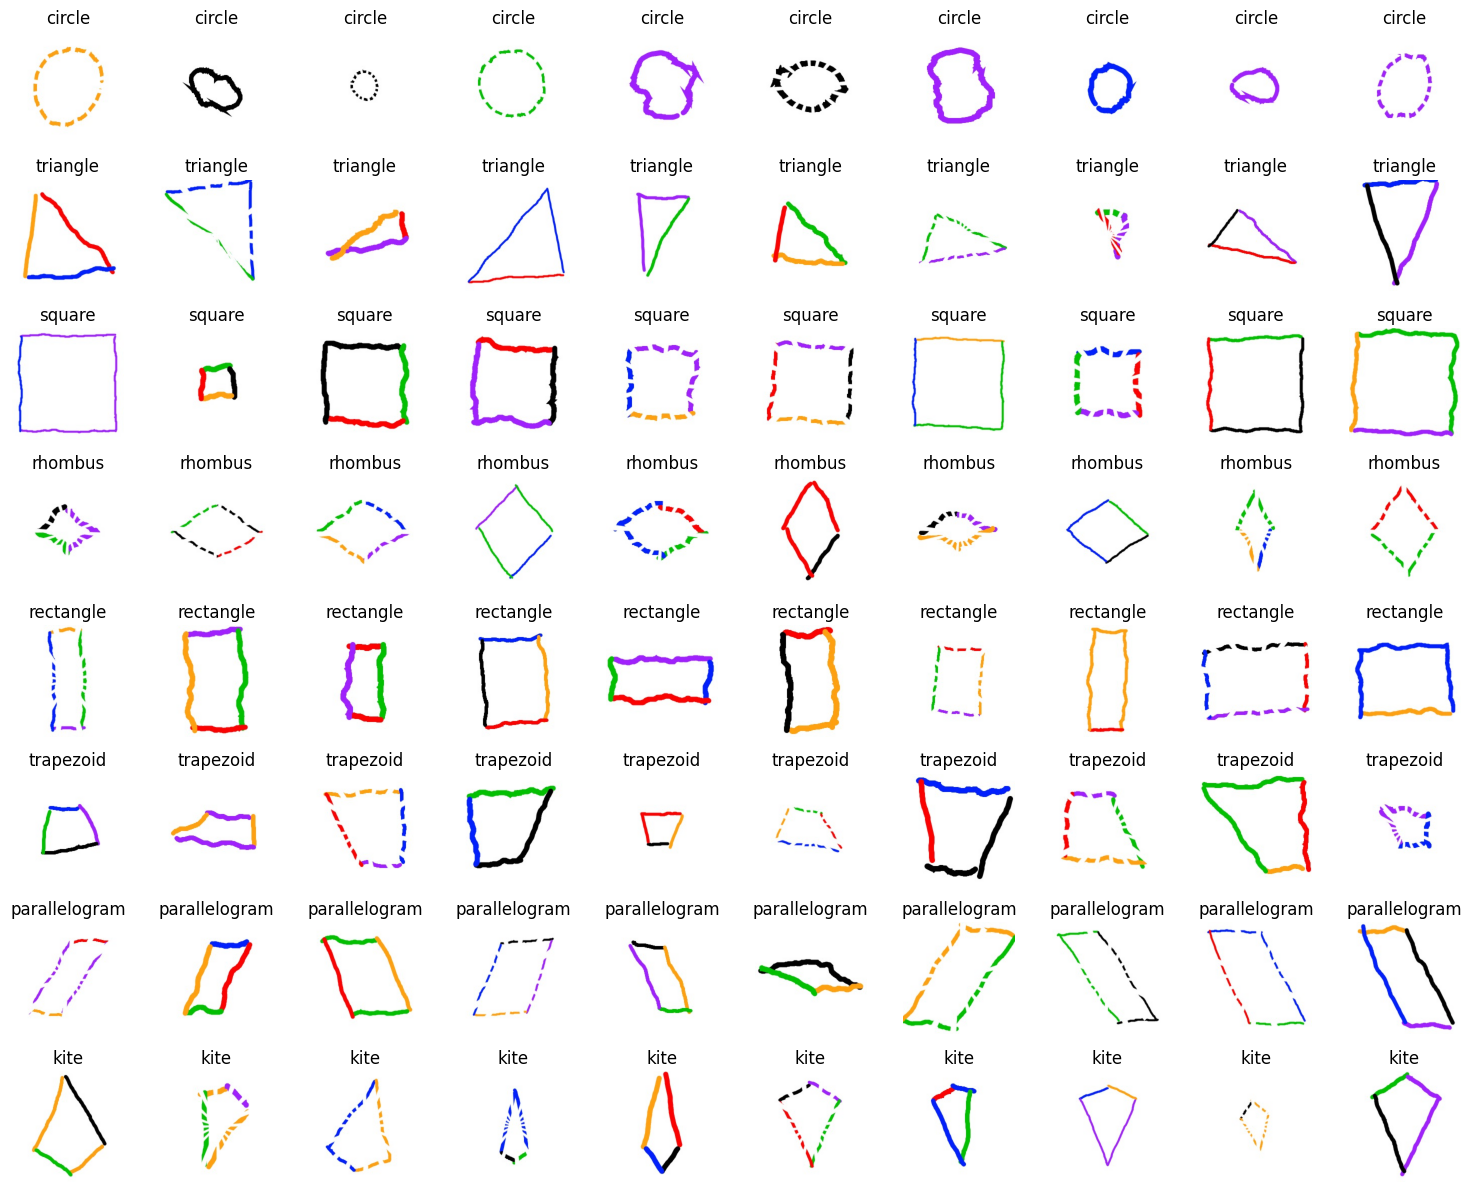

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

train_directory = path+'/dataset/train'
plt.figure(figsize=(15, 15))

image_count = 1


for subfolder in os.listdir(train_directory):
    shapes_directory = os.path.join(train_directory, subfolder)


    for image_name in os.listdir(shapes_directory)[:10]:
        image_path = os.path.join(shapes_directory, image_name)
        img = mpimg.imread(image_path)
        plt.subplot(10, 10, image_count)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(subfolder)

        image_count += 1


plt.tight_layout()
plt.show()

In [ ]:
train_directory = path+'/dataset/train'
plt.figure(figsize=(15, 15))


for subfolder in os.listdir(train_directory):
    shapes_directory = os.path.join(train_directory, subfolder)


    for image_name in os.listdir(shapes_directory):
        image_path = os.path.join(shapes_directory, image_name)
        img = cv2.imread(image_path)

        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, binary_img = cv2.threshold(gray_img, 200, 255, cv2.THRESH_BINARY)
        cv2.imwrite(image_path, binary_img)

<Figure size 1500x1500 with 0 Axes>

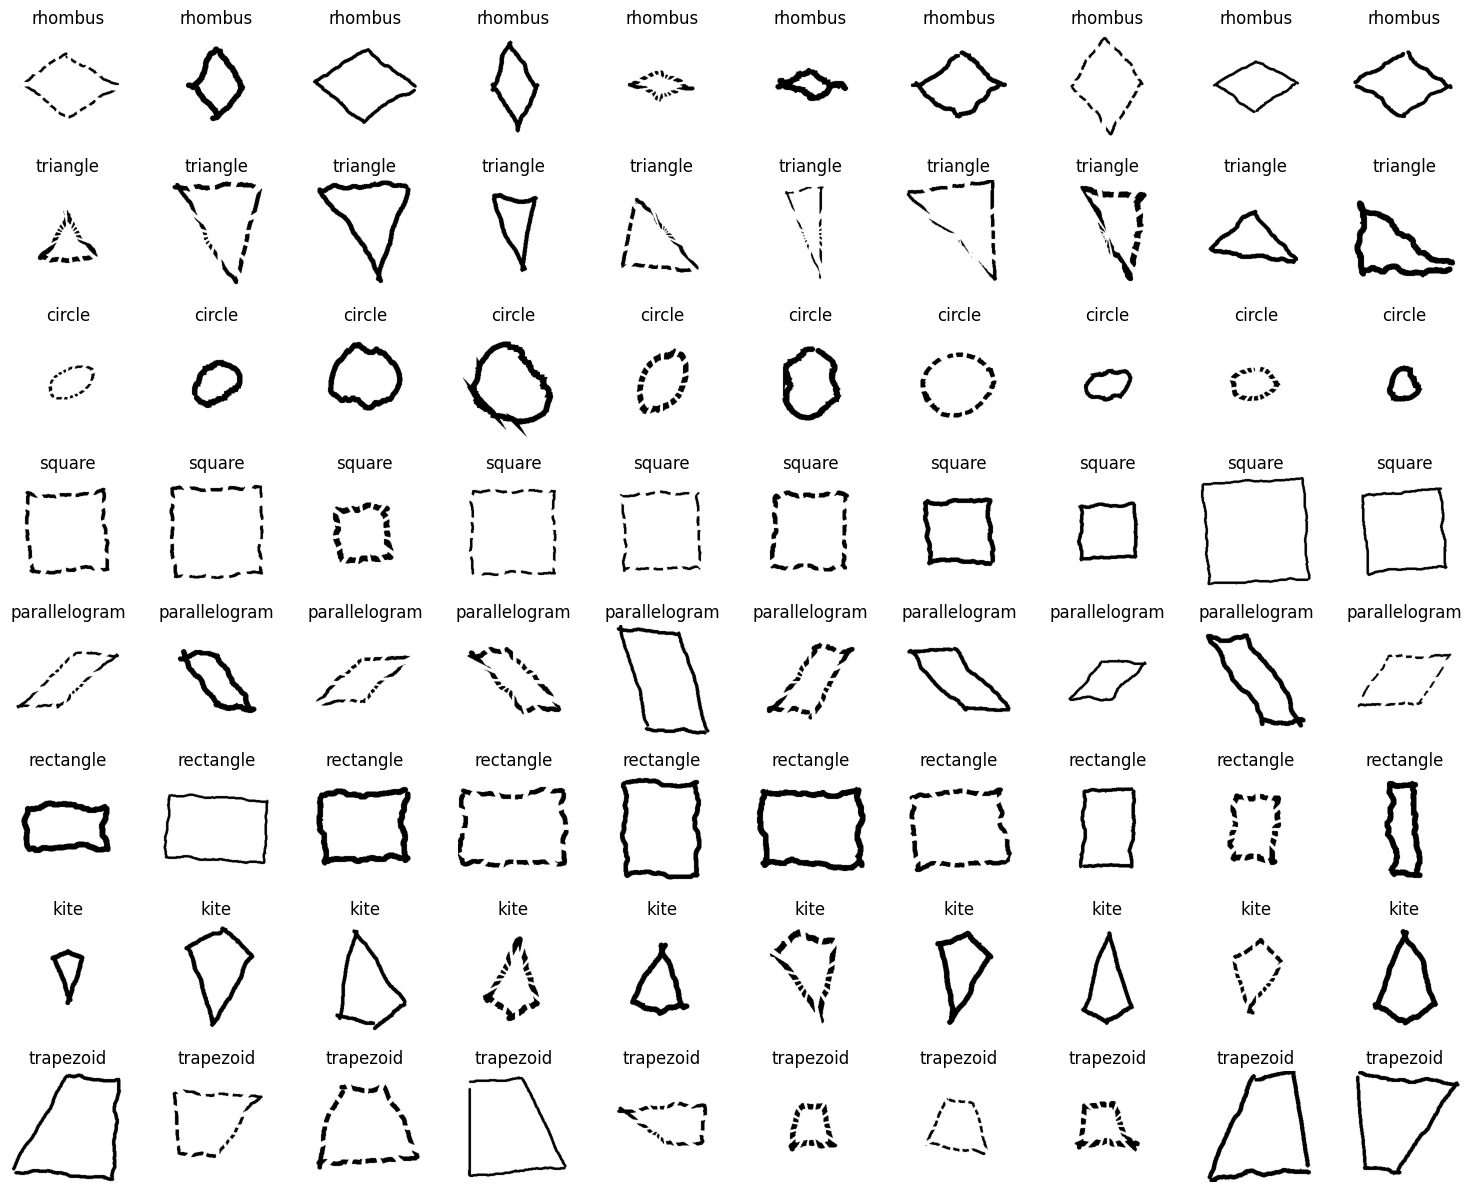

In [ ]:
train_directory = path+'/dataset/train'
plt.figure(figsize=(15, 15))

image_count = 1


for subfolder in os.listdir(train_directory):
    shapes_directory = os.path.join(train_directory, subfolder)


    for image_name in os.listdir(shapes_directory)[:10]:
        image_path = os.path.join(shapes_directory, image_name)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(10, 10, image_count)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(subfolder)

        image_count += 1


plt.tight_layout()
plt.show()

In [ ]:
import os
import cv2
import numpy as np
train_directory = path+'/dataset/train'

X=[]
Y=[]

for subfolder in os.listdir(train_directory):
    shapes_directory = os.path.join(train_directory, subfolder)
    for image_name in os.listdir(shapes_directory):
        image_path = os.path.join(shapes_directory, image_name)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        pixel_values = img.flatten()
        X.append(pixel_values)
        Y.append(subfolder)

X=np.array(X)
X[X == 0] = 1
X[X > 200] = 0
X[X != 0] = 1

In [ ]:

test_directory = path+'/dataset/test'
X_test=[]
Y_test=[]

for subfolder in os.listdir(test_directory):
    shapes_directory = os.path.join(test_directory, subfolder)


    for image_name in os.listdir(shapes_directory):
        image_path = os.path.join(shapes_directory, image_name)
        img = cv2.imread(image_path)

        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, binary_img = cv2.threshold(gray_img, 200, 255, cv2.THRESH_BINARY)
        pixel_values = binary_img.flatten()
        X_test.append(pixel_values)
        Y_test.append(subfolder)

X_test=np.array(X_test)
X_test[X_test == 0] = 1
X_test[X_test > 200] = 0
X_test[X_test != 0] = 1

In [ ]:
mapping = {'rectangle': 0, 'parallelogram': 1, 'trapezoid': 2, 'square': 3,'circle': 4, 'kite': 5, 'triangle': 6, 'rhombus': 7}
Y = [mapping.get(x, -1) for x in Y]
Y_test = [mapping.get(x, -1) for x in Y_test]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
X_reduced = pca.fit_transform(X)
knn_model = KNeighborsClassifier(n_neighbors=5);
knn_model.fit(X_reduced,Y);

In [ ]:
X_test_reduced = pca.transform(X_test)
predictions = knn_model.predict(X_test_reduced)
#y_pred_knn = knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
conf_matrix_knn = confusion_matrix(Y_test, predictions)
accuracy_knn = accuracy_score(Y_test, predictions)
precision_knn = precision_score(Y_test, predictions, average="macro")
recall_knn = recall_score(Y_test, predictions, average="macro")
f1_knn = f1_score(Y_test, predictions, average="macro")

In [ ]:
print("Confusion Matrix (KNeighborsClassifier):\n", conf_matrix_knn)
print("Accuracy (KNeighborsClassifier):", accuracy_knn)
print("Precision (KNeighborsClassifier):", precision_knn)
print("Recall (KNeighborsClassifier):", recall_knn)
print("F1-Score (KNeighborsClassifier):", f1_knn)

Confusion Matrix (KNeighborsClassifier):
 [[495   1   1   0   1   1   1   0]
 [  1 485   5   0   3   1   1   4]
 [ 28  40 362  27   8   3  31   1]
 [  0   0   0 499   1   0   0   0]
 [  1   6   3  10 473   2   0   5]
 [  0   0   0   0   5 491   1   3]
 [  3   6  14   1   1  37 437   1]
 [  0   0   0   0   5   1   0 494]]
Accuracy (KNeighborsClassifier): 0.934
Precision (KNeighborsClassifier): 0.934561546778611
Recall (KNeighborsClassifier): 0.9339999999999999
F1-Score (KNeighborsClassifier): 0.9318724670557954


In [ ]:
import joblib
joblib.dump(knn_model, 'knn_model.pkl')

['knn_model.pkl']

In [ ]:
from google.colab import files
files.download('knn_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
joblib.dump(pca, 'pca_model.pkl')

['pca_model.pkl']

In [ ]:
from google.colab import files
files.download('pca_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(X, Y)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred_LR = model.predict(X_test)

In [ ]:
conf_matrix_LR = confusion_matrix(Y_test, y_pred_LR)
accuracy_LR = accuracy_score(Y_test, y_pred_LR)
precision_LR = precision_score(Y_test, y_pred_LR, average="macro")
recall_LR = recall_score(Y_test, y_pred_LR, average="macro")
f1_LR = f1_score(Y_test, y_pred_LR, average="macro")
print("Confusion Matrix (LR):\n", conf_matrix_LR)
print("Accuracy (LR):", accuracy_LR)
print("Precision (LR):", precision_LR)
print("Recall (LR):", recall_LR)
print("F1-Score (LR):", f1_LR)

Confusion Matrix (LR):
 [[394   5  43  42  10   2   4   0]
 [ 14 299  85  19  26  12  41   4]
 [ 47 105 206  46  21   0  75   0]
 [ 35  21  88 347   7   0   2   0]
 [ 23  22  14   6 423   6   5   1]
 [  2   5   1   0  22 452   9   9]
 [ 22  53  25  18  12  15 353   2]
 [  1   0   0   0  17   3   0 479]]
Accuracy (LR): 0.73825
Precision (LR): 0.7360872345927446
Recall (LR): 0.73825
F1-Score (LR): 0.736742995661533


In [ ]:
import joblib
from google.colab import files
joblib.dump(model, 'LR_model.pkl')
files.download('LR_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>